# Bike Share Study

Problem Statement - 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The bike service company, BoomBikes, want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   - Which variables are significant in predicting the demand for shared bikes.
   - How well those variables describe the bike demands

In [3]:
# Importing all the libraries for carrying out the analysis and model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn # Importing the SciKit  
from sklearn.model_selection import train_test_split  # For splitting the data in training & test dataset
from sklearn.preprocessing import MinMaxScaler # For scaling the data
from statsmodels.stats.outliers_influence import variance_inflation_factor # For carrying out VIF Analysis
from sklearn.metrics import r2_score # For carrying out R-squared method

import statsmodels.api as sm

In [4]:
# Reading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Since dtedy is an object we have to convert it to an float
df['dteday'] = pd.to_datetime(df.dteday)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
# Converting datatypes of categorical columns to category type. This is done so that we can apply pd.get_dummies() later on.

df['season']=df.season.astype('category')
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

### Renaming the column values for the columns yr, season, month, weekday, weathersit from numeric to category

In [8]:
df['season'] = df['season'].replace({1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [9]:
df['mnth'] = df['mnth'].replace({1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
                                9:'September', 10:'October',11: 'November', 12:'December'})
df['mnth'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [10]:
df['weekday'] = df['weekday'].replace({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df['weekday'].value_counts()

Tuesday      105
Wednesday    105
Monday       104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [11]:
df['weathersit'] = df['weathersit'].replace({1: 'Clear', 2:'Misty', 3:'Light Rain/Snow', 4:'Adverse'})
df['weathersit'].value_counts()

Clear              463
Misty              246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [12]:
# Segregating the columns into categorical and continuous

df1 = df[['dteday','temp','atemp','hum','windspeed','casual','registered','cnt']] # Continuous variables
print(df1.head())

# ['season','yr','mnth','holiday','weekday','workingday','weathersit']  Categorical Varibales

df2 = df[['season','yr','mnth','holiday','weekday','workingday','weathersit']]
print(df2.head())

      dteday       temp     atemp      hum  windspeed  casual  registered  \
0 2018-01-01  14.110847  18.18125  80.5833  10.749882     331         654   
1 2018-02-01  14.902598  17.68695  69.6087  16.652113     131         670   
2 2018-03-01   8.050924   9.47025  43.7273  16.636703     120        1229   
3 2018-04-01   8.200000  10.60610  59.0435  10.739832     108        1454   
4 2018-05-01   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   season yr     mnth holiday    weekday workingday weathersit
0  Spring  0  January       0    Tuesday          1      Misty
1  Spring  0  January       0  Wednesday          1      Misty
2  Spring  0  January       0   Thursday          1      Clear
3  Spring  0  January       0     Friday          1      Clear
4  Spring  0  January       0   Saturday          1      Clear


array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'dteday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

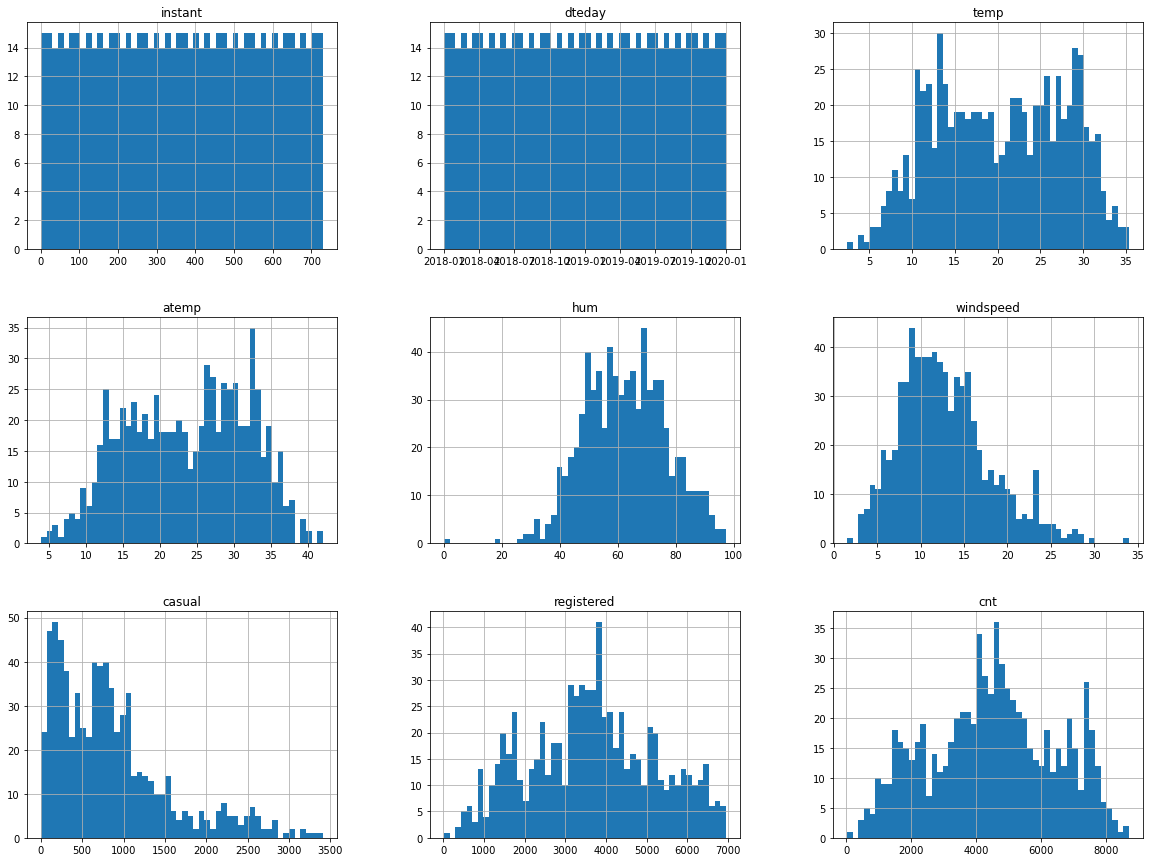

In [13]:
%matplotlib inline               
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))

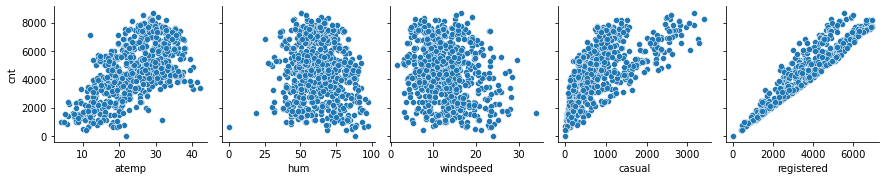

In [14]:
# Creating a pairplot of all the numerical variables
sns.pairplot(data=df1,
                  y_vars=['cnt'],
                  x_vars=['atemp','hum','windspeed','casual','registered'])

In [15]:
# Plotting the categorical columns against cnt 

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

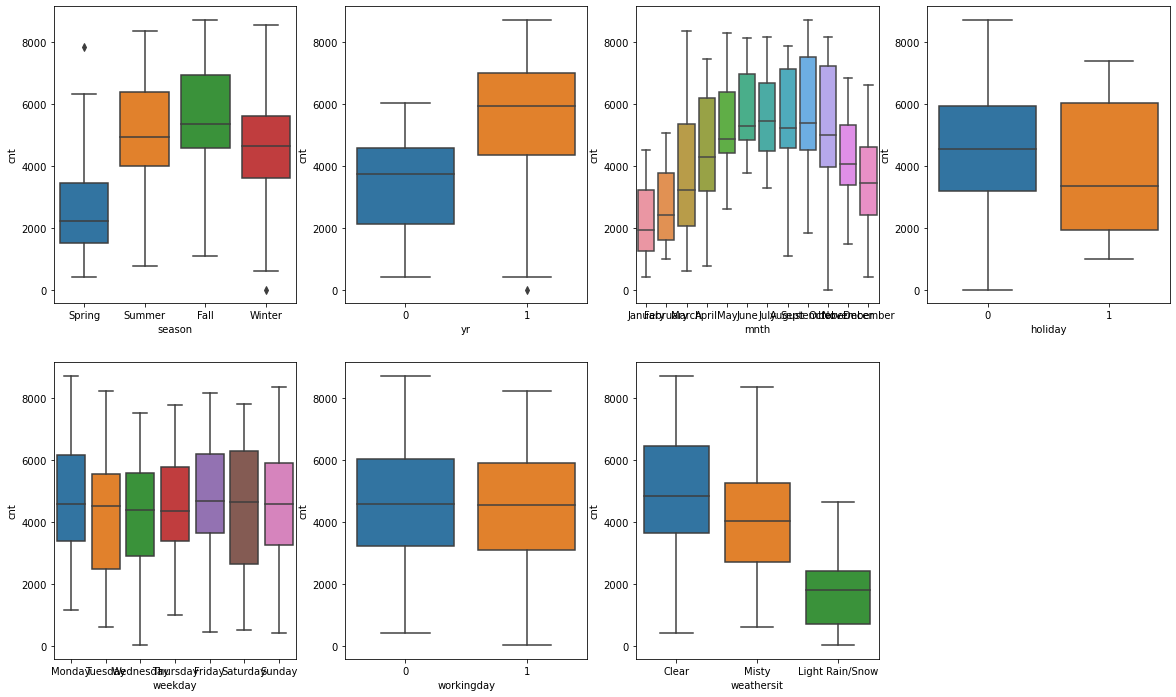

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

### Dummy Variables
We have to create dummy variables for season, weathersit, mnth and weekday

In [17]:
Season = pd.get_dummies(df['season'])
Season.head()

,Spring,Summer,Fall,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


#### We can drop the first column since the season can be identified using the three columns where:
    
   - 000 will represent Spring
   - 100 will represent Summer
   - 010 will represent Fall
   - 001 will represent Winter

In [18]:
Season = pd.get_dummies(df['season'], drop_first=True)

In [19]:
# Replicating the above step for other catergorical columns

In [20]:
Weather=pd.get_dummies(df['weathersit'])
Weather.head()

,Clear,Misty,Light Rain/Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


#### We need not drop any column here since the fourth category for weather can be assumed if other three are not there, hence->

100 : Clear, Few clouds, Partly cloudy, Partly cloudy

010: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

001: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

000: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
Month = pd.get_dummies(df['mnth'])
Month.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


#### We can drop first column here since January can be represented as 000000000000. Likewise other months can be defined as 
010000000000 will be February, and so on.......

In [22]:
Month = pd.get_dummies(df['mnth'], drop_first=True)

In [23]:
Weekday=pd.get_dummies(df['weekday'])
Weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


#### # We can drop the first column here since Monday can be represented as 000000, Tuesday as 010000, Wednesday as 003000, and so on

In [24]:
Weekday=pd.get_dummies(df['weekday'], drop_first=True)

### Concatenating Season, Month, Weather, Weekday to the original dataframe

In [25]:
df = pd.concat([df, Season, Month, Weather, Weekday], axis=1)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,2018-01-01,Spring,0,January,0,Tuesday,1,Misty,14.110847,...,0,0,1,0,1,0,0,0,0,0
1,2,2018-02-01,Spring,0,January,0,Wednesday,1,Misty,14.902598,...,0,0,1,0,0,1,0,0,0,0
2,3,2018-03-01,Spring,0,January,0,Thursday,1,Clear,8.050924,...,0,1,0,0,0,0,1,0,0,0
3,4,2018-04-01,Spring,0,January,0,Friday,1,Clear,8.200000,...,0,1,0,0,0,0,0,1,0,0
4,5,2018-05-01,Spring,0,January,0,Saturday,1,Clear,9.305237,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,Spring,1,December,0,Saturday,1,Misty,10.420847,...,1,0,1,0,0,0,0,0,1,0
726,727,2019-12-28,Spring,1,December,0,Sunday,0,Misty,10.386653,...,1,0,1,0,0,0,0,0,0,1
727,728,2019-12-29,Spring,1,December,0,Monday,0,Misty,10.386653,...,1,0,1,0,0,0,0,0,0,0
728,729,2019-12-30,Spring,1,December,0,Tuesday,1,Clear,10.489153,...,1,1,0,0,1,0,0,0,0,0


In [26]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Summer', 'Fall', 'Winter', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'Clear', 'Misty', 'Light Rain/Snow',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [27]:
# Now we can drop the columns season, mnth, weekday, weathersit since they are now shown with dummy values
# Since the instant & dteday column is not going to help in analysis we can drop it
# We can also remove casual & registered columns since their addition is cnt which is where we are focusing

df = df.drop(columns=['instant', 'dteday','season','mnth','weekday','weathersit','casual','registered'], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


<AxesSubplot:>

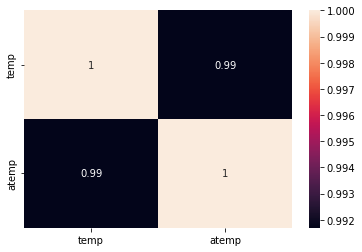

In [29]:
sns.heatmap(df[['temp','atemp']].corr(), annot=True)

#### As we can see above, the correlation between temp and atemp is almost equal to 1. Hence we can drop one of the columns. We will retain atemp since that is the feel temperature as experienced by the customer and contributes more to the decision making.

In [30]:
df = df.drop(['temp'], axis =1)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Fall,Winter,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Fall,Winter,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,1,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,0,0,...,1,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df_train.describe()

,atemp,hum,windspeed,cnt,Summer,Fall,Winter,February,March,April,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,...,0.084314,0.627451,0.343137,0.029412,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,...,0.278131,0.483958,0.475223,0.169124,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


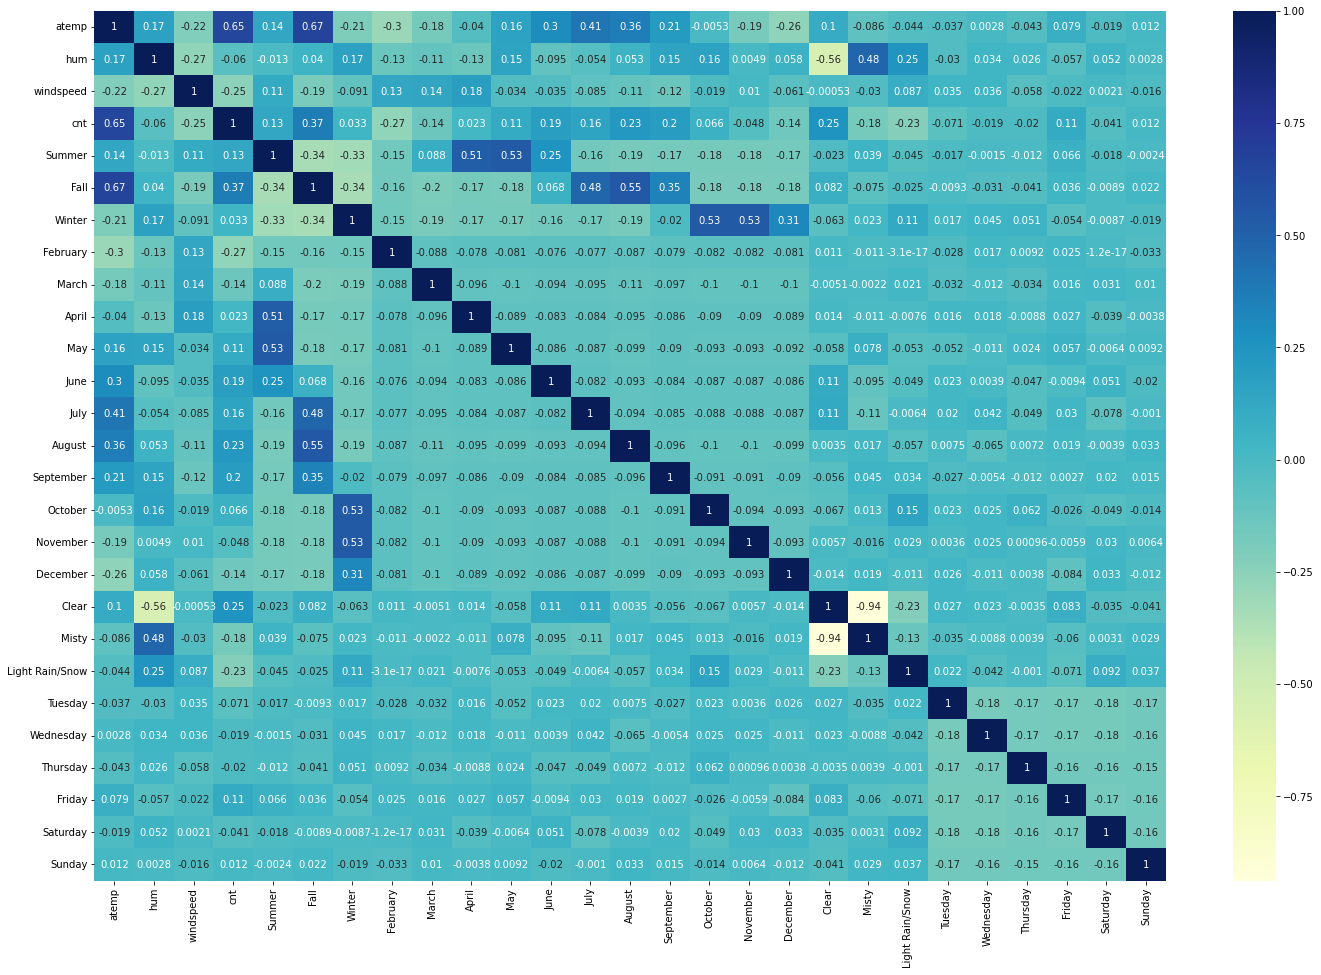

In [36]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As we can see, atemp is having highest relation to cnt. So we will go ahead building the model taking into account atemp only.

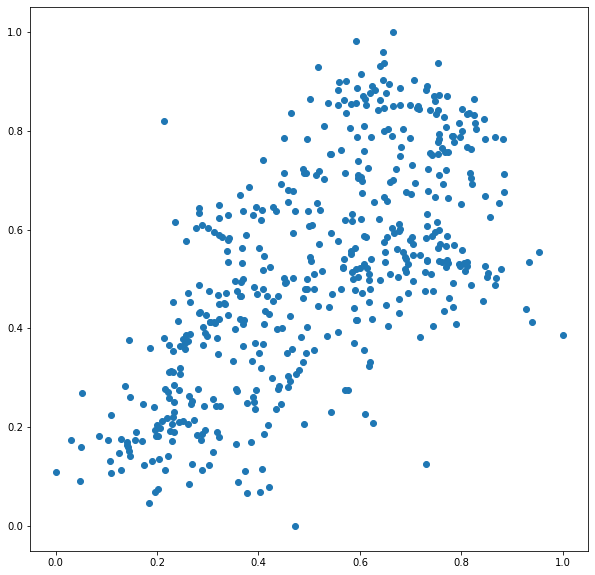

In [37]:
# We will see how a pairplot with atemp and cnt looks like

plt.figure(figsize=[10,10])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building a linear model

Here we will be using RFE function from Linear Regression 

### Model 1

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) # Running RFE with the output number of the variable equal to 10
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 3),
 ('Winter', True, 1),
 ('February', False, 11),
 ('March', False, 7),
 ('April', False, 9),
 ('May', False, 6),
 ('June', False, 8),
 ('July', False, 10),
 ('August', True, 1),
 ('September', True, 1),
 ('October', False, 4),
 ('November', False, 15),
 ('December', False, 16),
 ('Clear', False, 2),
 ('Misty', False, 5),
 ('Light Rain/Snow', True, 1),
 ('Tuesday', False, 19),
 ('Wednesday', False, 18),
 ('Thursday', False, 17),
 ('Friday', False, 13),
 ('Saturday', False, 14),
 ('Sunday', False, 20)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Summer', 'Winter',
       'August', 'September', 'Light Rain/Snow'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Fall', 'February', 'March', 'April', 'May', 'June',
       'July', 'October', 'November', 'December', 'Clear', 'Misty', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [43]:
 # Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
# Check the parameters obtained

lm.params

const              0.274706
yr                 0.227344
holiday           -0.086029
atemp              0.590609
hum               -0.291650
windspeed         -0.182564
Summer             0.097619
Winter             0.145855
August             0.063994
September          0.123473
Light Rain/Snow   -0.183782
dtype: float64

In [47]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.98e-183
Time:                        13:16:48   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2747      0.027     

In [48]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.72
3,atemp,1.43
8,August,1.40
6,Summer,1.38
7,Winter,1.31
4,hum,1.26
9,September,1.20
5,windspeed,1.17
10,Light Rain/Snow,1.11
1,yr,1.02


### Model 2
 Rebuilding the model after removing const

In [49]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [50]:
# Adding a constant variable 
#import statsmodels.api as sm  
#X_train_lm = sm.add_constant(X_train_new)

In [51]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1443.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:16:49   Log-Likelihood:                          437.66
No. Observations:                 510   AIC:                                     -855.3
Df Residuals:                     500   BIC:                                     -813.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yr                  0.2433      0.009     26.654      0.000       0.225       0.261
holiday            -0.0700      0.029     -2.392      0.017      -0.127      -0.013
atemp               0.6763      0.024     27.990      0.000       0.629       0.724
hum                -0.0330      0.022     -1.496      0.135      -0.076       0.010
windspeed          -0.0235      0.024     -0.986      0.325      -0.070       0.023
Summer              0.0929      0.013      7.430      0.000       0.068       0.117
Winter              0.1534      0.012     12.677      0.000       0.130       0.177
August              0.0490      0.018      2.670      0.008       0.013       0.085
September           0.1061      0.018      5.760      0.000       0.070       0.142
Light Rain/Snow    -0.2406      0.028     -8.613      0.000      -0.296      -0.186
==============================================================================
Omnibus:                       78.303   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.457
Skew:                          -0.824   Prob(JB):                     2.16e-38
Kurtosis:                       5.334   Cond. No.                         7.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.26
2,atemp,8.55
4,windspeed,3.55
0,yr,2.01
5,Summer,1.82
6,Winter,1.73
7,August,1.54
8,September,1.30
9,Light Rain/Snow,1.09
1,holiday,1.04


In [53]:
#Dropping the hum column since it's having a RFE value of above 5. 

X_train_new = X_train_new.drop(["hum"], axis = 1)

### Model 3

Rebuilding the model again

In [54]:
# Building the model again

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1599.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:16:49   Log-Likelihood:                          436.53
No. Observations:                 510   AIC:                                     -855.1
Df Residuals:                     501   BIC:                                     -816.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yr                  0.2422      0.009     26.589      0.000       0.224       0.260
holiday            -0.0719      0.029     -2.458      0.014      -0.129      -0.014
atemp               0.6527      0.018     35.661      0.000       0.617       0.689
windspeed          -0.0381      0.022     -1.753      0.080      -0.081       0.005
Summer              0.0908      0.012      7.299      0.000       0.066       0.115
Winter              0.1463      0.011     13.124      0.000       0.124       0.168
August              0.0489      0.018      2.664      0.008       0.013       0.085
September           0.1040      0.018      5.657      0.000       0.068       0.140
Light Rain/Snow    -0.2473      0.028     -8.958      0.000      -0.302      -0.193
==============================================================================
Omnibus:                       74.942   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.747
Skew:                          -0.803   Prob(JB):                     1.24e-35
Kurtosis:                       5.233   Cond. No.                         6.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.89
3,windspeed,2.95
0,yr,2.00
4,Summer,1.80
6,August,1.54
5,Winter,1.47
7,September,1.29
8,Light Rain/Snow,1.06
1,holiday,1.04


## Since all the VIF values are below 5, we can now safely say that the model is predicting correctly

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [56]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

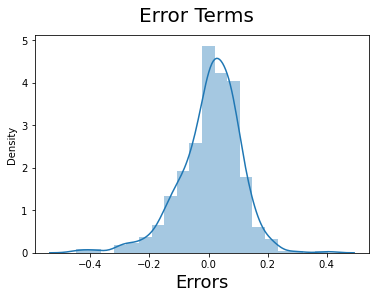

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Checking for homoscedasticity of the error terms

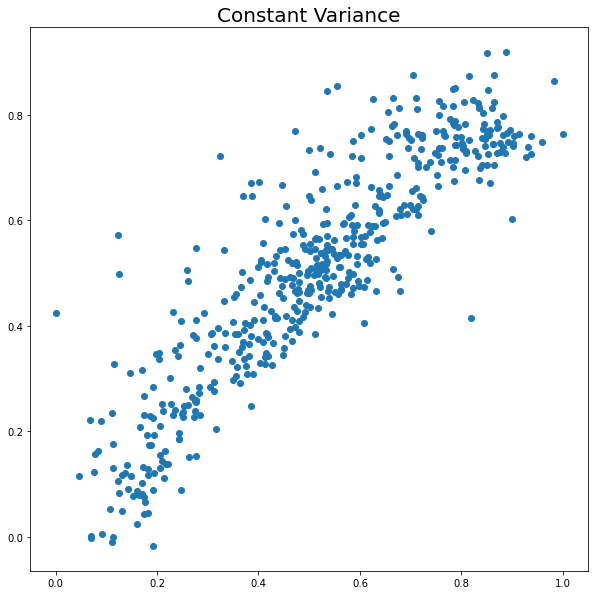

In [68]:
plt.figure(figsize=[10,10])
plt.scatter(y_train, y_train_cnt)
plt.title('Constant Variance', fontsize = 20)                  # Plot heading 
plt.show()

### Making Predictions

Applying the scaling on the test set

In [58]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Fall,Winter,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,1,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,1,0,0,0,0,0,0,0,1


#### Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
X_test

,yr,holiday,workingday,atemp,hum,windspeed,Summer,Fall,Winter,February,...,December,Clear,Misty,Light Rain/Snow,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
184,0,1,0,0.769660,0.657364,0.084219,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,0,0.496145,0.837699,0.334206,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,0,0.741471,0.314298,0.537414,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.243430,0.708888,0.287411,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
702,1,0,1,0.511907,0.756118,0.283397,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
127,0,0,1,0.577380,0.650923,0.069510,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
640,1,0,1,0.682653,0.817947,0.052115,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [61]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [62]:
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'Summer', 'Winter', 'August',
       'September', 'Light Rain/Snow'],
      dtype='object')

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
X_test_new


,yr,holiday,atemp,windspeed,Summer,Winter,August,September,Light Rain/Snow
184,0,1,0.769660,0.084219,0,0,0,0,0
535,1,0,0.842587,0.153728,1,0,0,0,0
299,0,0,0.496145,0.334206,0,1,0,0,0
221,0,0,0.795343,0.339570,0,0,1,0,0
152,0,0,0.741471,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
400,1,0,0.243430,0.287411,0,0,0,0,0
702,1,0,0.511907,0.283397,0,1,0,0,0
127,0,0,0.577380,0.069510,1,0,0,0,0
640,1,0,0.682653,0.052115,0,1,0,0,0


In [64]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

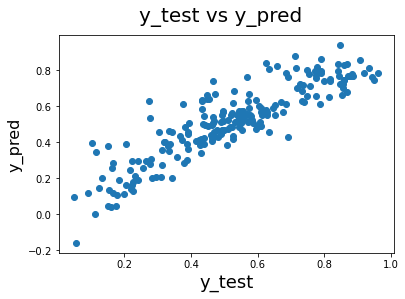

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### 'yr', 'holiday', 'atemp', 'windspeed', 'Summer', 'Winter', 'August', 'September', 'Light Rain/Snow'

These variables are highly correlated to the target variable, cnt, and the relation is mostly linear

In [75]:
finaldf = df[['cnt','yr','holiday', 'atemp', 'windspeed', 'Summer', 'Winter', 'August', 'September', 'Light Rain/Snow']]

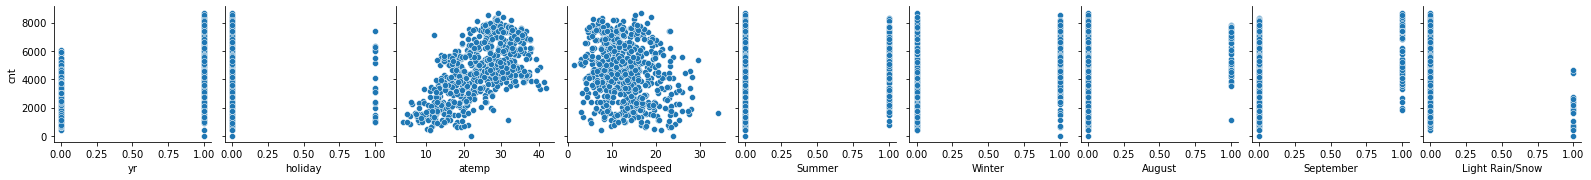

In [79]:
sns.pairplot(data=finaldf,
                  y_vars=['cnt'],
                  x_vars=['yr','holiday', 'atemp', 'windspeed', 'Summer', 'Winter', 'August', 'September', 'Light Rain/Snow'])